In [63]:
import pandas as pd
import matplotlib.pyplot as plt
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rcParams['font.family'] = 'NanumGothic'
#런타임  다시시작

Sudo가 이 컴퓨터에서 사용하지 않도록 설정되어 있습니다. 사용하도록 설정하려면 으로 이동하세요. ]8;;ms-settings:developers\Developer Settings page]8;;\ 설정 앱의
Sudo가 이 컴퓨터에서 사용하지 않도록 설정되어 있습니다. 사용하도록 설정하려면 으로 이동하세요. ]8;;ms-settings:developers\Developer Settings page]8;;\ 설정 앱의
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [64]:
# 총차이 함수 정의의
def cost_variance(df):
    df = df.copy() 
    df["가격/임율차이"] = df["평준화/예상원가"] - df["실제원가"]
    df["수량/시간차이"] = df["표준원가"] - df["평준화/예상원가"]
    df["총차이"] = df["가격/임율차이"] + df["수량/시간차이"]
    
    df["평가"] = df["총차이"].apply(lambda x: "F" if x > 0 else ("U" if x < 0 else "Neutral"))
    return df

In [65]:
# 직접재료원가
data1 = {
    "구분": ["직접재료원가"],
    "가격표준": [1000],
    "수량표준": [2],
    "표준거래처": [400],
    "가격실적": [1500],
    "수량실적": [1],
    "실적거래처": [900]
}

# Create a DataFrame
df1 = pd.DataFrame(data1)
df1 = df1.set_index("구분")
df1

,가격표준,수량표준,표준거래처,가격실적,수량실적,실적거래처
구분,,,,,,
직접재료원가,1000,2,400,1500,1,900


In [66]:
df1["실제원가"] = df1["가격실적"] * df1["수량실적"] * df1["실적거래처"]
df1["평준화/예상원가"] = df1["가격표준"] * df1["수량실적"] * df1["실적거래처"]
df1["표준원가"] = df1["가격표준"] * df1["수량표준"] * df1["표준거래처"]
df1

,가격표준,수량표준,표준거래처,가격실적,수량실적,실적거래처,실제원가,평준화/예상원가,표준원가
구분,,,,,,,,,
직접재료원가,1000,2,400,1500,1,900,1350000,900000,800000


In [67]:
# 총차이 구하기기
result_df1 = cost_variance(df1)
result_df1

,가격표준,수량표준,표준거래처,가격실적,수량실적,실적거래처,실제원가,평준화/예상원가,표준원가,가격/임율차이,수량/시간차이,총차이,평가
구분,,,,,,,,,,,,,
직접재료원가,1000,2,400,1500,1,900,1350000,900000,800000,-450000,-100000,-550000,U


In [68]:
# 직접노무원가
data2 = {
    "구분": ["직접노무원가"],
    "가격표준": [2000],
    "수량표준": [2],
    "표준거래처": [300],
    "가격실적": [1000],
    "수량실적": [2.5],
    "실적거래처": [900]
}

# Create a DataFrame
df2 = pd.DataFrame(data2)
df2 = df2.set_index("구분")
df2

,가격표준,수량표준,표준거래처,가격실적,수량실적,실적거래처
구분,,,,,,
직접노무원가,2000,2,300,1000,2.5,900


In [69]:
df2["실제원가"] = df2["가격실적"] * df2["수량실적"] * df2["실적거래처"]
df2["평준화/예상원가"] = df2["가격표준"] * df2["수량실적"] * df2["실적거래처"]
df2["표준원가"] = df2["가격표준"] * df2["수량표준"] * df2["표준거래처"]
df2

,가격표준,수량표준,표준거래처,가격실적,수량실적,실적거래처,실제원가,평준화/예상원가,표준원가
구분,,,,,,,,,
직접노무원가,2000,2,300,1000,2.5,900,2250000.0,4500000.0,1200000


In [70]:
# 총차이 구하기기
result_df2 = cost_variance(df2)
result_df2

,가격표준,수량표준,표준거래처,가격실적,수량실적,실적거래처,실제원가,평준화/예상원가,표준원가,가격/임율차이,수량/시간차이,총차이,평가
구분,,,,,,,,,,,,,
직접노무원가,2000,2,300,1000,2.5,900,2250000.0,4500000.0,1200000,2250000.0,-3300000.0,-1050000.0,U


In [71]:
# 고정간접원가
data3 = {
    "구분": ["고정간접원가1"],
    "정상작업량": [1000],
    "표준단위원가": [2000],
    "실제작업량": [900],
    "실제임차료": [2200000],
}

# Create a DataFrame
df3 = pd.DataFrame(data3)
df3 = df3.set_index("구분")
df3

,정상작업량,표준단위원가,실제작업량,실제임차료
구분,,,,
고정간접원가1,1000,2000,900,2200000


In [72]:
df3["실제원가"] = df3["실제임차료"]
df3["평준화/예상원가"] = df3["표준단위원가"] * df3["실제작업량"]
df3["표준원가"] = df3["표준단위원가"] * df3["정상작업량"]
df3

,정상작업량,표준단위원가,실제작업량,실제임차료,실제원가,평준화/예상원가,표준원가
구분,,,,,,,
고정간접원가1,1000,2000,900,2200000,2200000,1800000,2000000


In [73]:
# 총차이 구하기
result_df3 = cost_variance(df3)
result_df3

,정상작업량,표준단위원가,실제작업량,실제임차료,실제원가,평준화/예상원가,표준원가,가격/임율차이,수량/시간차이,총차이,평가
구분,,,,,,,,,,,
고정간접원가1,1000,2000,900,2200000,2200000,1800000,2000000,-400000,200000,-200000,U


In [74]:
# 고정간접원가
data4 = {
    "구분": ["고정간접원가2"],
    "피킹시간": [2],
    "표준조업도": [1000],
    "표준단위원가": [1500],
    "실제작업량": [900],
    "실제원가": [1200000]
}

# Create a DataFrame
df4 = pd.DataFrame(data4)
df4 = df4.set_index("구분")
df4

,피킹시간,표준조업도,표준단위원가,실제작업량,실제원가
구분,,,,,
고정간접원가2,2,1000,1500,900,1200000


In [75]:
df4["평준화/예상원가"] = df4["표준단위원가"] * df4["실제작업량"]
df4["표준원가"] = df4["표준단위원가"] * df4["표준조업도"]
df4

,피킹시간,표준조업도,표준단위원가,실제작업량,실제원가,평준화/예상원가,표준원가
구분,,,,,,,
고정간접원가2,2,1000,1500,900,1200000,1350000,1500000


In [76]:
# 총차이 구하기
result_df4 = cost_variance(df4)
result_df4

,피킹시간,표준조업도,표준단위원가,실제작업량,실제원가,평준화/예상원가,표준원가,가격/임율차이,수량/시간차이,총차이,평가
구분,,,,,,,,,,,
고정간접원가2,2,1000,1500,900,1200000,1350000,1500000,150000,150000,300000,F


In [77]:
# "실제원가", "평준화/예상원가", "표준원가", "가격/임율차이", "수량/시간차이", "총차이", "평가" 열만 추출해서 병합합
new_df1 = result_df1[["실제원가", "평준화/예상원가", "표준원가", "가격/임율차이", "수량/시간차이", "총차이", "평가"]]
new_df2 = result_df2[["실제원가", "평준화/예상원가", "표준원가", "가격/임율차이", "수량/시간차이", "총차이", "평가"]]
new_df3 = result_df3[["실제원가", "평준화/예상원가", "표준원가", "가격/임율차이", "수량/시간차이", "총차이", "평가"]]
new_df4 = result_df4[["실제원가", "평준화/예상원가", "표준원가", "가격/임율차이", "수량/시간차이", "총차이", "평가"]]

final_df = pd.concat([new_df1, new_df2, new_df3, new_df4], axis=0)
final_df

,실제원가,평준화/예상원가,표준원가,가격/임율차이,수량/시간차이,총차이,평가
구분,,,,,,,
직접재료원가,1350000.0,900000.0,800000,-450000.0,-100000.0,-550000.0,U
직접노무원가,2250000.0,4500000.0,1200000,2250000.0,-3300000.0,-1050000.0,U
고정간접원가1,2200000.0,1800000.0,2000000,-400000.0,200000.0,-200000.0,U
고정간접원가2,1200000.0,1350000.0,1500000,150000.0,150000.0,300000.0,F


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_26856\4027307440.py:12: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
c:\Users\boyu571\anaconda3\envs\commons\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


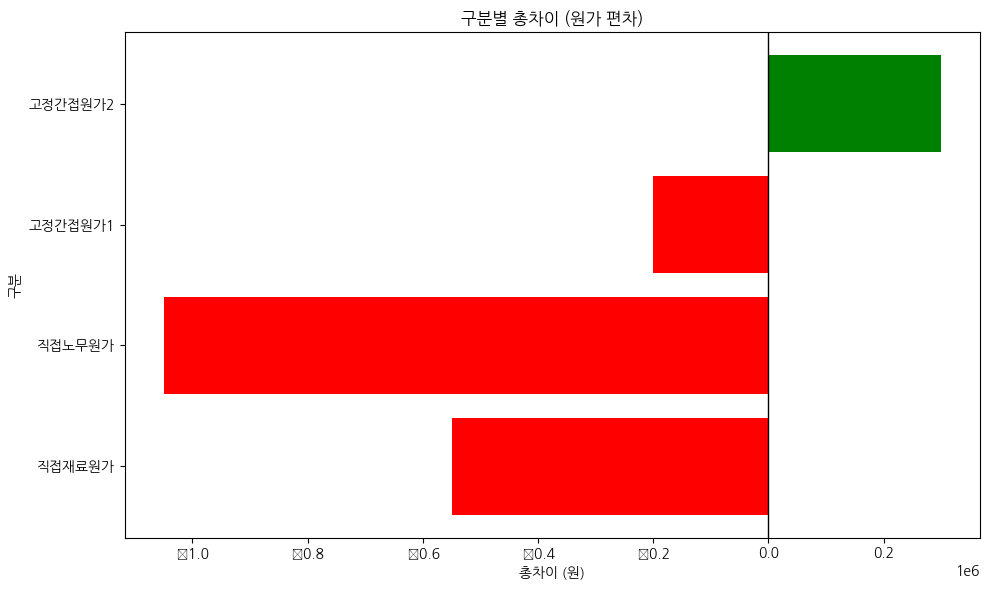

In [78]:
# 데이터 준비
plot_df = final_df.copy()
plot_df["색상"] = plot_df["평가"].map({"F": "green", "U": "red", "Neutral": "gray"})

# 그래프
plt.figure(figsize=(10, 6))
plt.barh(plot_df.index, plot_df["총차이"], color=plot_df["색상"])
plt.axvline(0, color='black', linewidth=1)
plt.title("구분별 총차이 (원가 편차)")
plt.xlabel("총차이 (원)")
plt.ylabel("구분")
plt.tight_layout()
plt.show()